# EXERCISE 1
**DESCRIPTION**

Assume that our animal observed the light intensity u = 2, the level of noise in its receptor is sigma_u = 1, and the mean and variance of its prior expectation of size are v_p = 3 and sigma_p = 1. Write a computer program that computes the posterior probabilities of sizes from  0.01  to  5, and plots them.


**TASK SUMMARY**

Compute & plot the posterior of sizes from 0.01 to 5.0.
- animal observed light intensity u=2
- noise of animal sensor (eye neuron) sigma_u = 1
- mean, variance of prior: v_p = 3, sigma_p = 1

<img src="bayesian_net.jpg" width="200"></div>

See [full tutorial here](https://www.sciencedirect.com/science/article/pii/S0022249615000759#bbr000050).


/Users/andyk/miniconda3/envs/free_energy_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


(array([1.9000e+01, 4.6000e+01, 7.8000e+01, 1.2100e+02, 1.4600e+02,
        1.6400e+02, 2.1900e+02, 2.5000e+02, 2.6500e+02, 3.0900e+02,
        3.6000e+02, 3.7600e+02, 3.9100e+02, 4.2000e+02, 4.8600e+02,
        5.2700e+02, 5.1400e+02, 5.6400e+02, 6.3600e+02, 6.4300e+02,
        6.9300e+02, 7.3800e+02, 7.9700e+02, 7.6400e+02, 8.6800e+02,
        8.8900e+02, 9.3100e+02, 1.0230e+03, 1.0570e+03, 1.0850e+03,
        1.1340e+03, 1.1990e+03, 1.2770e+03, 1.3110e+03, 1.3490e+03,
        1.4420e+03, 1.4530e+03, 1.5210e+03, 1.6410e+03, 1.6260e+03,
        1.8070e+03, 1.7530e+03, 1.8960e+03, 1.9430e+03, 2.0950e+03,
        2.1680e+03, 2.1810e+03, 2.2960e+03, 2.3970e+03, 2.5850e+03,
        2.5610e+03, 2.6540e+03, 2.8010e+03, 2.9200e+03, 3.0200e+03,
        3.1470e+03, 3.3360e+03, 3.3400e+03, 3.4960e+03, 3.6600e+03,
        3.9690e+03, 4.0070e+03, 4.2830e+03, 4.3750e+03, 4.4740e+03,
        4.6850e+03, 4.7980e+03, 5.0780e+03, 5.2770e+03, 5.4910e+03,
        5.6030e+03, 5.9170e+03, 6.1060e+03, 6.51

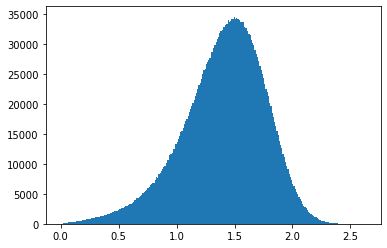

In [2]:
#!pip install pystan matplotlib scipy
import numpy as np
import matplotlib.pyplot as plt

prior = np.random.normal(3.,1.,100000000)
likelihood = np.random.normal(prior,1.)

plt.hist(np.sqrt(likelihood[(prior>1.99) & (prior<2.1)]),250)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_667d95d407cb3dc23b530b56e9cd0331 NOW.


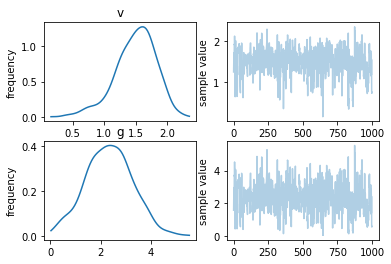

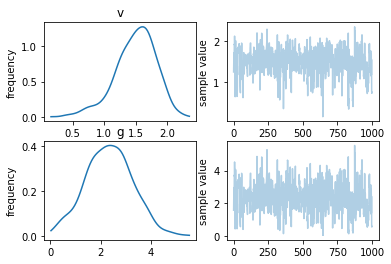

In [2]:
import pystan
import scipy

m_code = """
data {
    real u;
}
parameters {
    real v;
}
transformed parameters {
    real g;
    g = v * v;
}
model {
    v ~ normal(3, 1);  // v_p = 3; sigma_p = 1
    u ~ normal(g, 1);  // sigma_u = 1
}
"""

sm = pystan.StanModel(model_code=m_code)
fit = sm.sampling(data={'u': 2}, iter=1000, chains=2)
fit.plot()

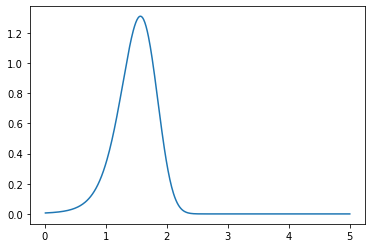

In [42]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# v is random var from normal distr w/ mean `v_p`, std `sigma_p`
v_p = 3
sigma_p = 1

# u is random var from normal distr w/ mean `observed_u`, std `sigma_u`
observed_u = 2
sigma_u = 1

x_start = 0.01
x_stop = 5
dt = 0.01

x = np.linspace(x_start, x_stop, int(x_stop/dt))
prior_v = scipy.stats.norm.pdf(x, v_p, sigma_p)
likelihood_u = scipy.stats.norm.pdf(observed_u, np.square(x), sigma_u)
numerator = prior_v * likelihood_u
normalization_term = np.sum(numerator * dt)
prob_v_given_u = numerator / normalization_term

plt.plot(x, prob_v_given_u)

# EXERCISE 2
**DESCRIPTION**


Write a computer program finding the most likely size of the food item phi for the situation described in Exercise  1. Initialize phi = v_p, and then find its values in the next 5 time units (you can use Euler’s method, i.e. update phi(t + delta t) = phi(t)+ delta t df/dphi with delta t = 0.01).

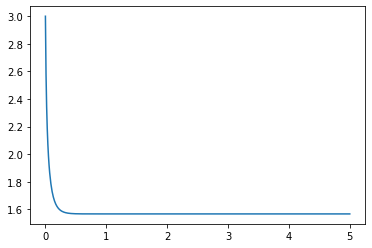

In [1]:
import scipy.stats
import matplotlib.pyplot as plt

# phi is random var from normal distr w/ mean `v_p`, std `sigma_p`
v_p = 3
sigma_p = 1

phi = [v_p]


# u is random var from normal distr w/ mean `observed_u`, std `sigma_u`
observed_u = 2
sigma_u = 1

# 500 iterations, 100 per time step t
start_t = 0
end_t = 5
dt = 0.01

def df_dphi(phi):
    return ((v_p - phi) / sigma_p) + ((observed_u - phi * phi) / sigma_u) * 2 * phi

for i in range(int(end_t / dt)):
    der = df_dphi(phi[i])
    #print(der)
    phi.append(phi[i] + dt * der)

plt.plot([x*dt for x in range(len(phi))], phi)

# Exercise 3

epsilon_p 0
epsilon_u 0
phi 3



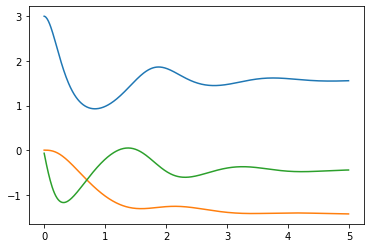

In [52]:
import matplotlib.pyplot as plt

u = 2
v_p = 3
sigma_p = 1
sigma_u = 1

phi = v_p
epsilon_u = 0
epsilon_p = 0
print(f"epsilon_p {epsilon_p}")
print(f"epsilon_u {epsilon_u}")
print(f"phi {phi}")
print()

dt = 0.01

def g(phi): return phi * phi
def g_prime(phi): return 2 * phi

t, phi_array, epsilon_p_array, epsilon_u_array = [], [], [], []
for i in range(500):
    t.append(i * dt)

    # Update vals for this timestep
    #     0         * 2*3          - 1 = -1
    phi = phi + dt * (epsilon_u * g_prime(phi) - epsilon_p)
    #print(f"phi {phi}")

    #             0 - 3   - 1       * 0 = -1
    epsilon_p = epsilon_p + dt * (phi - v_p - sigma_p * epsilon_p)
    #print(f"epsilon_p {epsilon_p}")
    
    #           2 - 0      - 1      * 0 = 1
    epsilon_u = epsilon_u + dt * (u - g(phi) - sigma_u * epsilon_u)
    #print(f"epsilon_u {epsilon_u}")
    
    #print()

    # Accumulate results
    phi_array.append(phi)
    epsilon_p_array.append(epsilon_p)
    epsilon_u_array.append(epsilon_u)

#plt.plot(t, phi_array)
plt.plot(t, epsilon_p_array)
#plt.plot(t, epsilon_u_array])

### Analysis of epsilon_p
Show how epsilon_p converges over t if we intialize it to a range of values

epsilon_p_ar [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
epsilon_u_ar [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
phi_ar [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]



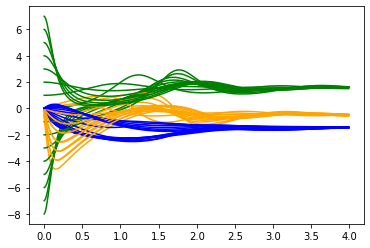

In [29]:
import matplotlib.pyplot as plt

u = 2
sigma_p = 1
sigma_u = 1

num_lines = 16
#v_p = 3
#phi_ar = [v_p for i in range(num_lines)]
phi_ar = [i - int(num_lines / 2) for i in range(num_lines)]
epsilon_u_ar = [0 for i in range(num_lines)]
epsilon_p_ar = [0 for i in range(num_lines)]
print(f"epsilon_p_ar {epsilon_p_ar}")
print(f"epsilon_u_ar {epsilon_u_ar}")
print(f"phi_ar {phi_ar}")
print()

t_max = 4
dt = 0.01

def g(phi): return phi * phi
def g_prime(phi): return 2 * phi

t = [i*dt for i in range(int(t_max/dt))]

# phi_res indexed by [line_num][step_num]
phi_res, epsilon_p_res, epsilon_u_res = [], [], []

for i in range(num_lines):
    phi_res.append([])
    epsilon_p_res.append([])
    epsilon_u_res.append([])

    for j in range(int(t_max/dt)):
        phi_ar[i] = phi_ar[i] + dt * (epsilon_u_ar[i] * g_prime(phi_ar[i]) - epsilon_p_ar[i])
        epsilon_p_ar[i] = epsilon_p_ar[i] + dt * (phi_ar[i] - v_p - sigma_p * epsilon_p_ar[i])
        epsilon_u_ar[i] = epsilon_u_ar[i] + dt * (u - g(phi_ar[i]) - sigma_u * epsilon_u_ar[i])

        # Accumulate results
        phi_res[i].append(phi_ar[i])
        epsilon_p_res[i].append(epsilon_p_ar[i])
        epsilon_u_res[i].append(epsilon_u_ar[i])

for k in range(num_lines):
    plt.plot(t, phi_res[k],c="green")
    plt.plot(t, epsilon_p_res[k],c="blue")
    plt.plot(t, epsilon_u_res[k],c="orange")